In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.environ['CLMM_MODELING_BACKEND'] = 'ccl'

In [3]:
import clmm
import clmm.theory as m
from clmm import Cosmology as clmm_cosmo

# Precision required on Sigma and DeltaSigma

In [4]:
cosmo = clmm_cosmo(H0 = 70.0, Omega_dm0 = 0.27 - 0.045, Omega_b0 = 0.045, Omega_k0 = 0.0)

In [5]:
density_profile_parametrization = 'nfw'
mass_Delta = 200
cluster_mass_ref = 1.e14
cluster_concentration = 4
z_cl = 1.
z_source = 2.

M_variation=np.logspace(-2,1,30) # [%]

In [6]:
R = np.logspace(-3, 1, 2)
print(R)

[1.e-03 1.e+01]


In [7]:
DeltaSigma_ref = m.compute_excess_surface_density(R, cluster_mass_ref, cluster_concentration, z_cl, cosmo=cosmo, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

Sigma_ref = m.compute_surface_density(R, cluster_mass_ref, cluster_concentration, z_cl, cosmo=cosmo, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

In [8]:
res=np.zeros((len(R),len(M_variation)))
# To run with CCL backend for optimal vectorisation
for i,var in enumerate(M_variation):
    cluster_mass = cluster_mass_ref * (1 + M_variation/100.)
    DeltaSigma = m.compute_excess_surface_density(R, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)
    Sigma = m.compute_surface_density(R, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)
     

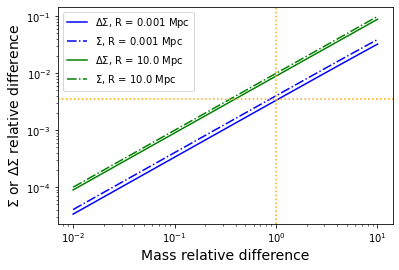

In [14]:
fontsize=14
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
c = ['blue', 'green']
for i in np.arange(len(R)):
    ax.plot(M_variation,np.abs(DeltaSigma.T[i]-DeltaSigma_ref[i])/DeltaSigma_ref[i], 
            label=f"$\Delta\Sigma$, R = {R[i]} Mpc", color=c[i])
    ax.plot(M_variation,np.abs(Sigma.T[i]-Sigma_ref[i])/Sigma_ref[i], linestyle='-.', 
            label=f"$\Sigma$, R = {R[i]} Mpc", color=c[i])
ax.legend()
ax.set_xlabel("Mass relative difference", size=fontsize)
ax.set_ylabel(r"$\Sigma$ or $\Delta\Sigma$ relative difference", size=fontsize)
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(1, linestyle=':', color='orange')
ax.axhline(3.5e-3, linestyle=':', color='orange')
fig.savefig('required_precision.pdf')